## Data visualization Ejercicio 2

### Profesor: Miguel Sempere Navarro
### Alumno: Marcelo Contreras Muñoz

## 1. Escoger tres variables Quandl

In [2]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import os 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import quandl

In [79]:
#4QnKR-Ncp5AFovvnFT8h
#quandl.ApiConfig.api_key = "4QnKR-Ncp5AFovvnFT8h"
#fuente: 
#https://www.quandl.com/data/CHRIS/CME_M6E1-E-micro-Euro-American-Dollar-Futures-Continuous-Contract-1-M6E1-Front-Month

In [60]:
START_DATE="2020-01-01"
END_DATE = dt.datetime.now().date().strftime("%Y-%m-%d")

start_date_suffix = START_DATE.replace("-","_")
end_date_suffix = END_DATE.replace("-","_")

In [61]:
mydata=quandl.get("CHRIS/CME_M6E1", authtoken="4QnKR-Ncp5AFovvnFT8h")

In [62]:
mydata = quandl.get("CHRIS/CME_M6E1", start_date=START_DATE, end_date=END_DATE)

In [63]:
df=pd.DataFrame(mydata)

In [64]:
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2020-01-02,1.1335,1.1338,1.1278,1.1285,0.0066,1.1280,27.0,84.0
2020-01-03,1.1277,1.1291,1.1237,1.1268,NaN,1.1280,16.0,75.0
2020-01-06,1.1272,1.1317,1.1270,1.1310,0.0024,1.1304,20.0,76.0
2020-01-07,1.1305,1.1309,1.1245,1.1265,0.0048,1.1256,23.0,76.0
2020-01-08,1.1261,1.1277,1.1213,1.1214,0.0035,1.1221,59.0,74.0


In [65]:
df=df.iloc[:,:6]

In [66]:
df.head()

,Open,High,Low,Last,Change,Settle
Date,,,,,,
2020-01-02,1.1335,1.1338,1.1278,1.1285,0.0066,1.1280
2020-01-03,1.1277,1.1291,1.1237,1.1268,NaN,1.1280
2020-01-06,1.1272,1.1317,1.1270,1.1310,0.0024,1.1304
2020-01-07,1.1305,1.1309,1.1245,1.1265,0.0048,1.1256
2020-01-08,1.1261,1.1277,1.1213,1.1214,0.0035,1.1221


In [67]:
df.reset_index(level=0,inplace=True)

In [68]:
df.head()

,Date,Open,High,Low,Last,Change,Settle
0,2020-01-02,1.1335,1.1338,1.1278,1.1285,0.0066,1.1280
1,2020-01-03,1.1277,1.1291,1.1237,1.1268,NaN,1.1280
2,2020-01-06,1.1272,1.1317,1.1270,1.1310,0.0024,1.1304
3,2020-01-07,1.1305,1.1309,1.1245,1.1265,0.0048,1.1256
4,2020-01-08,1.1261,1.1277,1.1213,1.1214,0.0035,1.1221


#### Nota: Métodos de matplotlib que se reutilizan en seaborn:
plt.figure()
plt.title()
plt.legend()
plt.show()

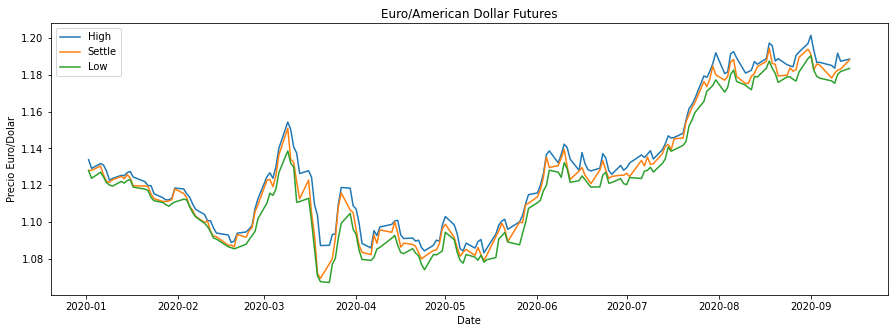

In [131]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['High'],label='High')
plt.plot(df['Date'],df['Settle'],label='Settle')
plt.plot(df['Date'],df['Low'],label='Low')
plt.xlabel('Date')
plt.ylabel('Precio Euro/Dolar')
plt.title('Euro/American Dollar Futures')
plt.grid(False)
plt.legend()

Text(0.5, 1.0, 'Euro/American Dollar Futures')

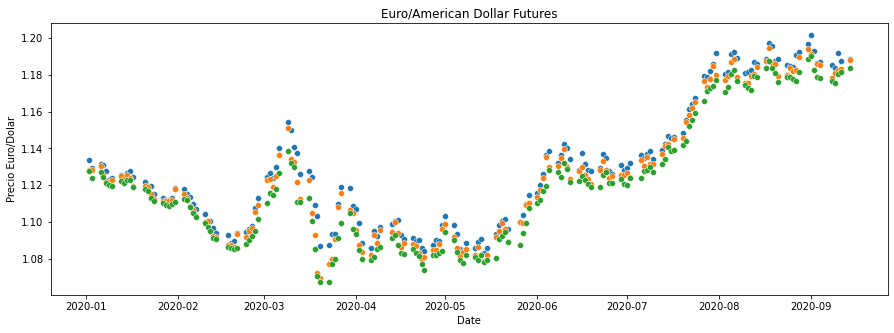

In [78]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.scatterplot(data=df, x="Date", y="High",ax=ax)
sns.scatterplot(data=df, x="Date", y="Settle",ax=ax)
sns.scatterplot(data=df, x="Date", y="Low",ax=ax)
plt.xlabel('Date')
plt.ylabel('Precio Euro/Dolar')
plt.title('Euro/American Dollar Futures')

### Mejor visualización
A mi modo de ver la mejor visualización para las variables high,settle y low es la de linea, ya que nos permite crear rangos máximo y minímo en el que valor del euro en base al dolar ha fluctuado a lo largo del 2020

### Natural Gas; Natural Gas spot price at the Henry Hub terminal in Louisiana;  US  per Million Metric British Thermal Unit

In [92]:
data2=quandl.get("ODA/PNGASUS_USD", authtoken="4QnKR-Ncp5AFovvnFT8h")

In [101]:
data2=quandl.get("ODA/PNGASUS_USD", start_date='2019-01-01', end_date=END_DATE)

In [102]:
df2=pd.DataFrame(data2)

In [103]:
df2.reset_index(level=0,inplace=True)
df2.head()

,Date,Value
0,2019-01-31,3.079524
1,2019-02-28,2.716111
2,2019-03-31,2.935000
3,2019-04-30,2.652500
4,2019-05-31,2.627864


In [128]:
df2.head()

,Date,Value
0,2019-01-31,3.079524
1,2019-02-28,2.716111
2,2019-03-31,2.935000
3,2019-04-30,2.652500
4,2019-05-31,2.627864


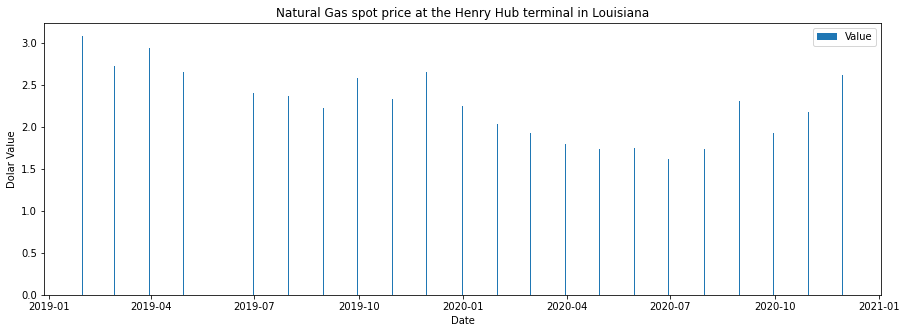

In [142]:
plt.figure(figsize=(15,5))
plt.bar(df2['Date'],df2['Value'],label='Value')
plt.xlabel('Date')
plt.ylabel('Dolar Value')
plt.title('Natural Gas spot price at the Henry Hub terminal in Louisiana')
plt.grid(False)
plt.legend()

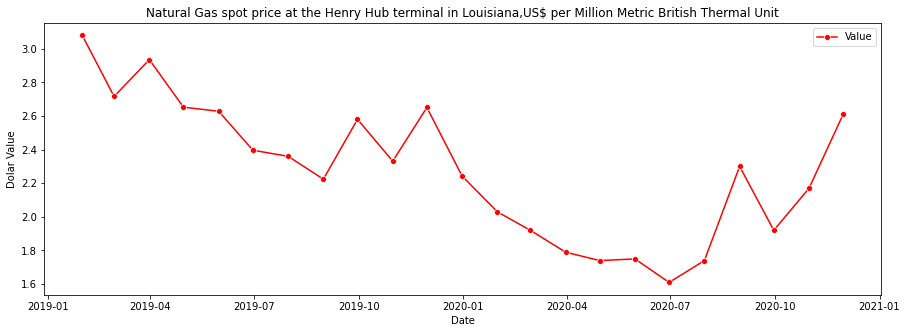

In [186]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(data=df2, x="Date", y="Value",ax=ax,label='Value',marker='o', 
dashes=False,color='red')
plt.xlabel('Date')
plt.ylabel('Dolar Value')
plt.legend()
plt.title('Natural Gas spot price at the Henry Hub terminal in Louisiana,US$ per Million Metric British Thermal Unit')
plt.grid(False)
plt.legend()

### Mejor visualización
En el análisis de esta segunda variable el precio del gas natural, el gráfico que mejor muestra la evolución es el de línea, commparandolo en esta oportunidad con el de barras que por lo general es para mostrar valores acumulados. 

## CO2 Emissions Allowances prices

In [144]:
data3=quandl.get("CHRIS/ICE_C1", authtoken="4QnKR-Ncp5AFovvnFT8h")

In [146]:
data3=quandl.get("CHRIS/ICE_C1", start_date='2019-01-01', end_date=END_DATE)

In [147]:
df3=pd.DataFrame(data3)

In [149]:
df3.reset_index(level=0,inplace=True)
df3.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2019-01-02,24.78,25.40,24.61,25.06,NaN,25.29,229.0,106848.0,NaN,None,1000.0
1,2019-01-03,24.65,24.76,23.81,23.08,-1.98,24.20,235.0,107392.0,NaN,None,4500.0
2,2019-01-04,23.12,23.74,23.03,23.54,0.46,23.35,100.0,104706.0,NaN,None,2919.0
3,2019-01-07,23.24,23.26,22.00,22.09,-1.45,22.39,408.0,103649.0,NaN,None,3075.0
4,2019-01-08,22.31,22.84,22.28,22.68,0.59,22.58,280.0,101527.0,NaN,None,200.0


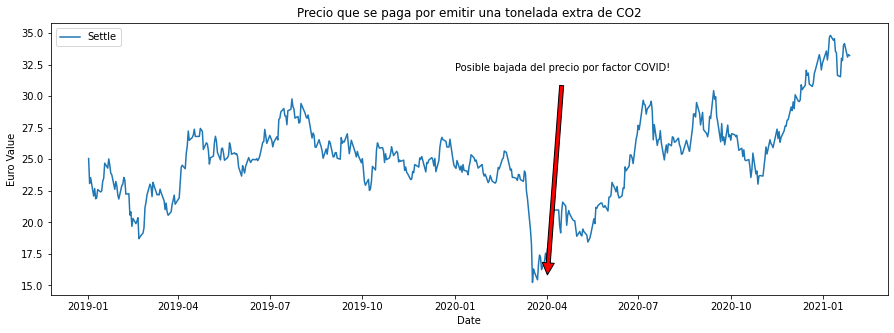

In [185]:
plt.figure(figsize=(15,5))
plt.plot(df3['Date'],df3['Settle'],label='Settle')
plt.xlabel('Date')
plt.ylabel('Euro Value')
plt.title('Precio que se paga por emitir una tonelada extra de CO2')
plt.grid(False)
plt.annotate('Posible bajada del precio por factor COVID!',
             xy=(pd.to_datetime('2020-04-01'),15),
             xytext=(pd.to_datetime('2020-01-01'),32),
             arrowprops={'facecolor':'r', 'shrink':0.05})
plt.legend()

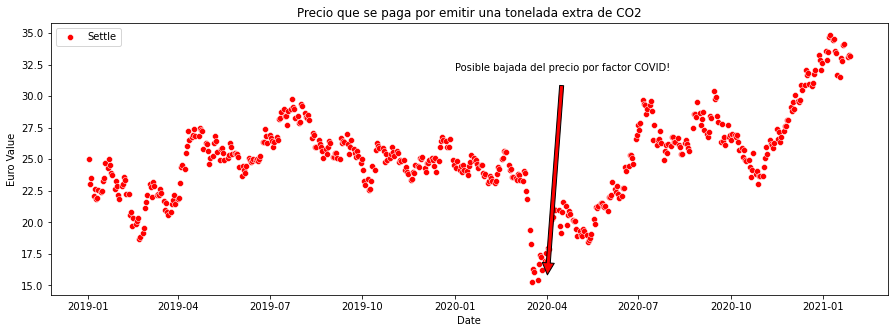

In [200]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.scatterplot(data=df3, x="Date", y="Settle",ax=ax,label='Settle',color='red')
plt.xlabel('Date')
plt.ylabel('Euro Value')
plt.title('Precio que se paga por emitir una tonelada extra de CO2')
plt.grid(False)
plt.annotate('Posible bajada del precio por factor COVID!',
             xy=(pd.to_datetime('2020-04-01'),15),
             xytext=(pd.to_datetime('2020-01-01'),32),
             arrowprops={'facecolor':'r', 'shrink':0.05})
plt.legend()

### Mejor visualización
para estas vizualiciones he agregado notas en donde se ve una disminución en el precio de la emision de CO2, quizas sea por el efecto covid de confinamiento, agregando esta opción en ambos gráfico funciona de manera correcta, pero en el de lineas es más limpio, ya que en el de dispersion los puntos y el color escogido ensucian el gráfico.

## 2. Visualización de datos con Bokeh 3 gráficos de líneas

In [201]:
from bokeh.plotting import figure, output_file, save, gridplot, show

In [228]:
x=data3['Date']
y=data3["Settle"]

i=data2['Date']
j=data2["Value"]

w=df['Date']
z=df["Settle"]

output_file("bokeh_lines_1.html")

s1 = figure( x_axis_label='Date', y_axis_label='Euro',x_axis_type="datetime",width=500, plot_height=500, title='Precio que se paga por emitir una tonelada extra de CO2')
s1.line(x, y,color='navy', alpha=0.5,legend_label='Settle',line_color="red")

s2 = figure(x_axis_label='Date', y_axis_label='Dolar',x_axis_type="datetime",width=500, height=500, x_range=s1.x_range, y_range=s1.y_range, title='Natural Gas spot price') 
s2.line(i, j,  color='red', alpha=0.5,legend_label='Value',line_color="blue")

s3 = figure(x_axis_label='Date', y_axis_label='Euro/Dolar',x_axis_type="datetime",width=500, height=500, x_range=s1.x_range, title='Euro/American Dollar Futures') 
s3.line(w, z, color='green', alpha=0.5,legend_label='Settle',line_color="green")

p = gridplot([[s1, s2, s3]])
show(p)

## 3. Escoger una de las variables y categorizarla

In [402]:
df.head()

,Date,Open,High,Low,Last,Change,Settle
0,2020-01-02,1.1335,1.1338,1.1278,1.1285,0.0066,1.1280
1,2020-01-03,1.1277,1.1291,1.1237,1.1268,NaN,1.1280
2,2020-01-06,1.1272,1.1317,1.1270,1.1310,0.0024,1.1304
3,2020-01-07,1.1305,1.1309,1.1245,1.1265,0.0048,1.1256
4,2020-01-08,1.1261,1.1277,1.1213,1.1214,0.0035,1.1221


In [403]:
df4=df.copy()
df4=df4[['Date','Settle']]
df4.head()

,Date,Settle
0,2020-01-02,1.1280
1,2020-01-03,1.1280
2,2020-01-06,1.1304
3,2020-01-07,1.1256
4,2020-01-08,1.1221


In [404]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    177 non-null    datetime64[ns]
 1   Settle  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [405]:
value=df4.loc[:,('Settle')]
categoria=[]

for i in value:
    if i <= 1.13:
        i='Bajo'
        categoria.append(i)
    elif i>1.13 and i <1.19:
        i='Medio'
        categoria.append(i)
    else:
        i='Alto'
        categoria.append(i)
        
        
df4['Categoria']=categoria
df4.head()

,Date,Settle,Categoria
0,2020-01-02,1.1280,Bajo
1,2020-01-03,1.1280,Bajo
2,2020-01-06,1.1304,Medio
3,2020-01-07,1.1256,Bajo
4,2020-01-08,1.1221,Bajo


In [406]:
bajo=[]
medio=[]
alto=[]
for i in df4['Categoria']:
    if i=='Bajo':
        bajo.append(i)
    elif i=='Medio':
        medio.append(i)
    else:
        alto.append(i)
cuenta_bajo=0
cuenta_medio=0
cuenta_alto=0
for i in range(len(bajo)):
    cuenta_bajo=cuenta_bajo+1
for i in range(len(medio)):
    cuenta_medio=cuenta_medio+1
for i in range(len(alto)):
    cuenta_alto=cuenta_alto+1

total=cuenta_bajo+cuenta_medio+cuenta_alto
porcentaje_bajo=round((cuenta_bajo/total)*100,2)
porcentaje_medio=round((cuenta_medio/total)*100,2)
porcentaje_alto=round((cuenta_alto/total)*100,2)

serie={'Bajo':porcentaje_bajo,'Medio':porcentaje_medio,'Alto':porcentaje_alto}
df_porcentajes =pd.DataFrame([key for key in serie.keys()], columns=['Categorias'])
df_porcentajes['%porcentaje'] = [value for value in serie.values()]
df_porcentajes

,Categorias,%porcentaje
0,Bajo,65.54
1,Medio,32.77
2,Alto,1.69


In [389]:
df_porcentajes.set_index('Categorias',inplace=True)

In [456]:
df_porcentajes.style.background_gradient(subset=['%porcentaje'],cmap='Greens')

,Categorias,%porcentaje
0,Bajo,65.540000
1,Medio,32.770000
2,Alto,1.690000


In [415]:
df_porcentajes.style.bar(subset=['%porcentaje'], color='#F7DC6F')

,Categorias,%porcentaje
0,Bajo,65.540000
1,Medio,32.770000
2,Alto,1.690000


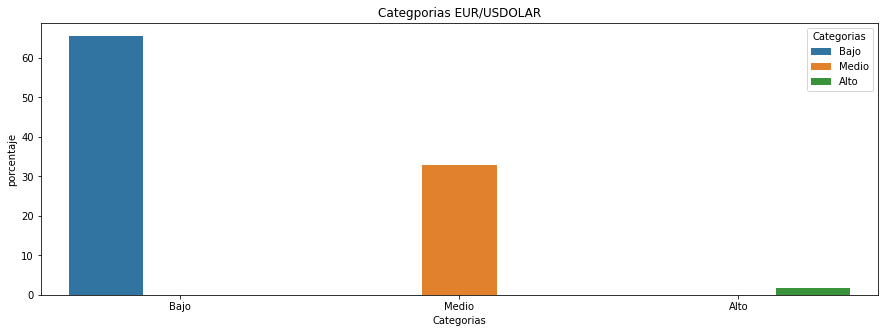

In [466]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=df_porcentajes, x="Categorias", y="%porcentaje",ax=ax,hue='Categorias')
plt.xlabel('Categorias')
plt.ylabel('porcentaje')
plt.title('Categporias EUR/USDOLAR')
plt.grid(False)
plt.show()

## 4. Variable con estacionalidad 

In [484]:
data_est=quandl.get("CHRIS/ICE_C1", authtoken="4QnKR-Ncp5AFovvnFT8h", start_date="2010-01-01")

In [485]:
data_est=pd.DataFrame(data_est)
data_est.reset_index(level=0,inplace=True)
data_est.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2010-01-04,13.09,13.09,13.09,13.09,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2010-01-05,12.70,12.70,12.70,12.70,-0.39,NaN,NaN,0.0,NaN,NaN,NaN
2,2010-01-06,12.41,12.41,12.41,12.41,-0.29,NaN,NaN,0.0,NaN,NaN,NaN
3,2010-01-07,12.73,12.73,12.73,12.73,0.32,NaN,NaN,0.0,NaN,NaN,NaN
4,2010-01-08,13.00,13.00,13.00,13.00,0.27,NaN,NaN,0.0,NaN,NaN,NaN


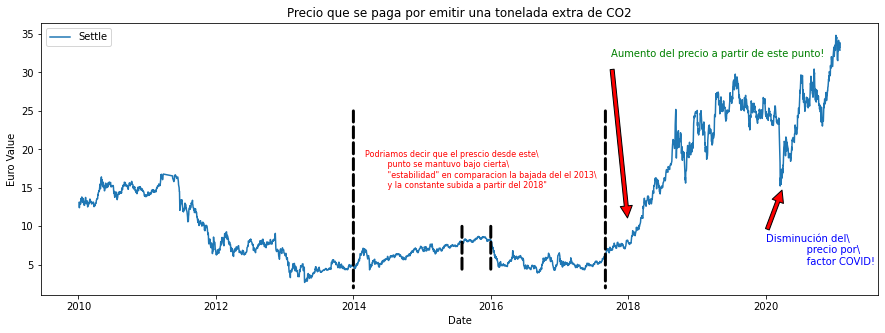

In [579]:
plt.figure(figsize=(15,5))
plt.plot(data_est['Date'],data_est['Settle'],label='Settle')
plt.xlabel('Date')
plt.ylabel('Euro Value')
plt.title('Precio que se paga por emitir una tonelada extra de CO2')
plt.grid(False)
plt.annotate('Aumento del precio a partir de este punto!',
             xy=(pd.to_datetime('2018-01-01'),10),
             xytext=(pd.to_datetime('2017-10-01'),32),
             arrowprops={'facecolor':'r', 'shrink':0.05},color='green')
plt.annotate('',
             xy=(pd.to_datetime('2014-01-01'),2),
             xytext=(pd.to_datetime('2014-01-01'),25),
             arrowprops={"arrowstyle" : "-", "linestyle" : "--",
                         "linewidth" : 3, "shrinkA": 0,"shrinkB": 0})
plt.annotate('',
             xy=(pd.to_datetime('2017-09-01'),2),
             xytext=(pd.to_datetime('2017-09-01'),25),
             arrowprops={"arrowstyle" : "-", "linestyle" : "--",
                         "linewidth" : 3, "shrinkA": 0,"shrinkB": 0})
plt.annotate('',
             xy=(pd.to_datetime('2015-08-01'),4),
             xytext=(pd.to_datetime('2015-08-01'),10),
             arrowprops={"arrowstyle" : "-", "linestyle" : "--",
                         "linewidth" : 3, "shrinkA": 0,"shrinkB": 0})
plt.annotate('',
             xy=(pd.to_datetime('2016-01-01'),4),
             xytext=(pd.to_datetime('2016-01-01'),10),
             arrowprops={"arrowstyle" : "-", "linestyle" : "--",
                         "linewidth" : 3, "shrinkA": 0,"shrinkB": 0})


plt.text(x=pd.to_datetime("2014-03-01"),
         y=15,
         s=r'Podriamos decir que el prescio desde este\
         punto se mantuvo bajo cierta\
         "estabilidad" en comparacion la bajada del el 2013\
         y la constante subida a partir del 2018"',
         color='red', fontsize=8)
plt.annotate(r'Disminución del\
             precio por\
             factor COVID!',
             xy=(pd.to_datetime('2020-04-01'),15),
             xytext=(pd.to_datetime('2020-01-01'),5),
             arrowprops={'facecolor':'r', 'shrink':0.05},color='blue')
plt.legend()

Quise mostrar en esta visualización que desde el 2014 hasta 2018 el precio tenía una variacion no tan marcada como lo fue desde el 2018, podriamos decir que el precio presenta una leve "estacionalidad" hacia fines del 2015 hasta principios de 2016, pero no es precisamente un varible con estacionalidad marcada, luego en el 2018 va en contante aunmento y en abril del 2020 el precio bajó abruptamente,quizas debido como lo mencione más arriba al factor COVID del confinamiento.